In [121]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the csv file

In [123]:
df =pd.read_csv('shop_data.csv')
df

,age,income,gender,m_status,buys
0,<25,high,male,single,no
1,<25,high,male,married,no
2,25-35,high,male,single,yes
3,>25,medium,male,single,yes
4,>25,low,female,single,yes
5,>25,low,female,single,no
6,25-35,low,female,single,no
7,<25,medium,male,married,no
8,<25,low,female,single,yes
9,25-35,medium,female,married,yes


In [124]:
x=df.iloc[:,:-1]
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>25,medium,male,single
4,>25,low,female,single
5,>25,low,female,single
6,25-35,low,female,single
7,<25,medium,male,married
8,<25,low,female,single
9,25-35,medium,female,married


In [125]:
y=df.iloc[:,-1]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6      no
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
Name: buys, dtype: object

## Decision tree model can not work with string. so we need to encode the labels

In [126]:
Le_x=LabelEncoder()

In [127]:
x=x.apply(LabelEncoder().fit_transform)
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,1
7,1,2,1,0
8,1,1,0,1
9,0,2,0,0


In [128]:
dtf=DecisionTreeClassifier(max_depth=5)

In [129]:
dtf.fit(x,y)

DecisionTreeClassifier(max_depth=5)

In [130]:
x.iloc[:,0:4]

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,1
7,1,2,1,0
8,1,1,0,1
9,0,2,0,0


In [131]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,1
7,1,2,1,0
8,1,1,0,1
9,0,2,0,0


In [132]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6      no
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
14     no
Name: buys, dtype: object

In [133]:
target_df = x.assign(target=list(y))
target_df

,age,income,gender,m_status,target
0,1,0,1,1,no
1,1,0,1,0,no
2,0,0,1,1,yes
3,2,2,1,1,yes
4,2,1,0,1,yes
5,2,1,0,1,no
6,0,1,0,1,no
7,1,2,1,0,no
8,1,1,0,1,yes
9,0,2,0,0,yes


In [134]:
xinput = np.array([2, 2, 0, 1])

In [135]:
y_predict=dtf.predict([xinput])
y_predict

array(['yes'], dtype=object)

# as you can see, with the input *[2, 2, 0, 1]* the output is *YES*. But is the table there are too row with the similer value row 4 and 5. and the output shown no and yes. so why the model prodict no as the answer. lets explain with # *feature_importances_* method 

## *feature_importances* method shows the importances of the factor in the tree

In [136]:
importance = dtf.feature_importances_
importance

array([0.69817073, 0.08362369, 0.15722997, 0.06097561])

In [137]:
column_name = list(x.columns)
column_name

['age', 'income', 'gender', 'm_status']

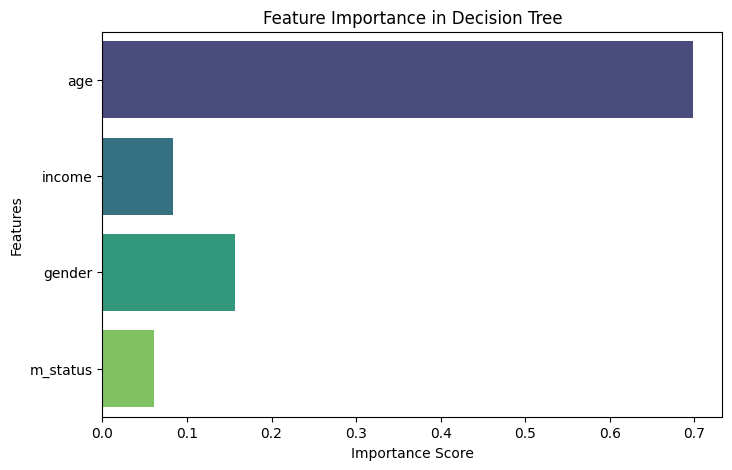

In [138]:
plt.figure(figsize=(8,5))
sns.barplot(x=importance, y=column_name, palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()


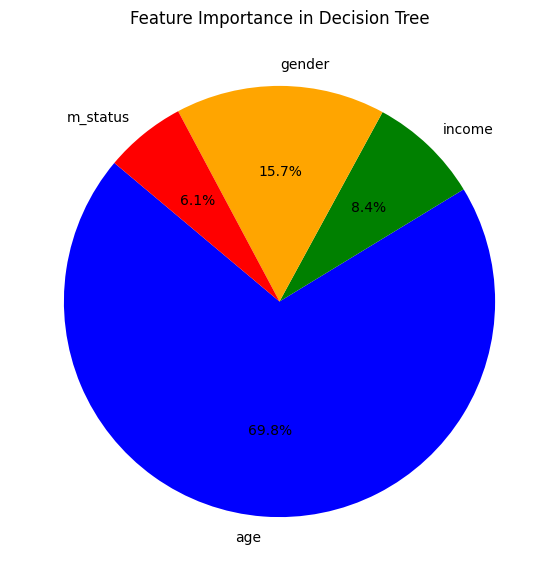

In [139]:
plt.figure(figsize=(7,7))
plt.pie(importance, labels=column_name, autopct='%1.1f%%', colors=['blue', 'green', 'orange', 'red'], startangle=140)
plt.title("Feature Importance in Decision Tree")
plt.show()


# As you can see the age is the most important factor of the dataset. The output is mostly dependent on the age column
# The model is heavily biased on age value

In [140]:
target_df

,age,income,gender,m_status,target
0,1,0,1,1,no
1,1,0,1,0,no
2,0,0,1,1,yes
3,2,2,1,1,yes
4,2,1,0,1,yes
5,2,1,0,1,no
6,0,1,0,1,no
7,1,2,1,0,no
8,1,1,0,1,yes
9,0,2,0,0,yes


# In the dataset. there are 5 row with age = 2. Three rows represent *YES* and Two represent *No*.

In [141]:
y_predict=dtf.predict([xinput])
y_predict

array(['yes'], dtype=object)

# Thats why the model predicted Yes as the output